In [2]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import os

%matplotlib inline

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
FRED_KEY = os.getenv("FRED_KEY")


In [5]:
from urllib.request import urlopen

In [6]:
import json

In [7]:
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)


In [9]:
url = (f"https://api.stlouisfed.org/fred/series/observations?series_id=T10YIE&api_key={FRED_KEY}&file_type=json")
raw_data = get_jsonparsed_data(url)

In [10]:
#raw_data

In [17]:
T10YIE_df = pd.DataFrame(raw_data['observations'])

In [18]:
T10YIE_df.head()

,realtime_start,realtime_end,date,value
0,2020-08-02,2020-08-02,2003-01-02,1.64
1,2020-08-02,2020-08-02,2003-01-03,1.62
2,2020-08-02,2020-08-02,2003-01-06,1.63
3,2020-08-02,2020-08-02,2003-01-07,1.62
4,2020-08-02,2020-08-02,2003-01-08,1.71


In [19]:
# convert to datetime
T10YIE_df['Date'] = pd.to_datetime(T10YIE_df['date'])
T10YIE_df.set_index('Date', inplace=True)
T10YIE_df = T10YIE_df.drop(columns=["date", "realtime_start", "realtime_end"]).sort_index()
T10YIE_df.tail(50)

,value
Date,
2020-05-25,.
2020-05-26,1.13
2020-05-27,1.14
2020-05-28,1.18
2020-05-29,1.15
2020-06-01,1.18
2020-06-02,1.18
2020-06-03,1.21
2020-06-04,1.22


In [20]:
#Removing "." in data
T10YIE_df = T10YIE_df[T10YIE_df.value != "."]
T10YIE_df.tail(50)

,value
Date,
2020-05-21,1.14
2020-05-22,1.12
2020-05-26,1.13
2020-05-27,1.14
2020-05-28,1.18
2020-05-29,1.15
2020-06-01,1.18
2020-06-02,1.18
2020-06-03,1.21


In [21]:
T10YIE_df['value'] = pd.to_numeric(T10YIE_df['value'],errors='coerce')

# Data Cleaning Function:

In [89]:
# Pulling time series:
def pull_time_series(time_series_code, dataframe_name):

    url = (f"https://api.stlouisfed.org/fred/series/observations?series_id={times_series_code}&api_key={FRED_KEY}&file_type=json")
    raw_data = get_jsonparsed_data(url)
    dataframe_name = pd.DataFrame(raw_data['observations'])
    
    # convert to datetime
    dataframe_name['Date'] = pd.to_datetime(dataframe_name['date'])
    dataframe_name.set_index('Date', inplace=True)
    dataframe_name = dataframe_name.drop(columns=["date", "realtime_start", "realtime_end"]).sort_index()
    dataframe_name['value'] = pd.to_numeric(dataframe_name['value'],errors='coerce')
    return dataframe_name

US_30_Mortgage_df = pull_time_series("MORTGAGE30US", "US_30_Mortgage_df")

In [90]:
US_30_Mortgage_df.isnull().sum()

value    0
dtype: int64

# Creating a Line Chart Function

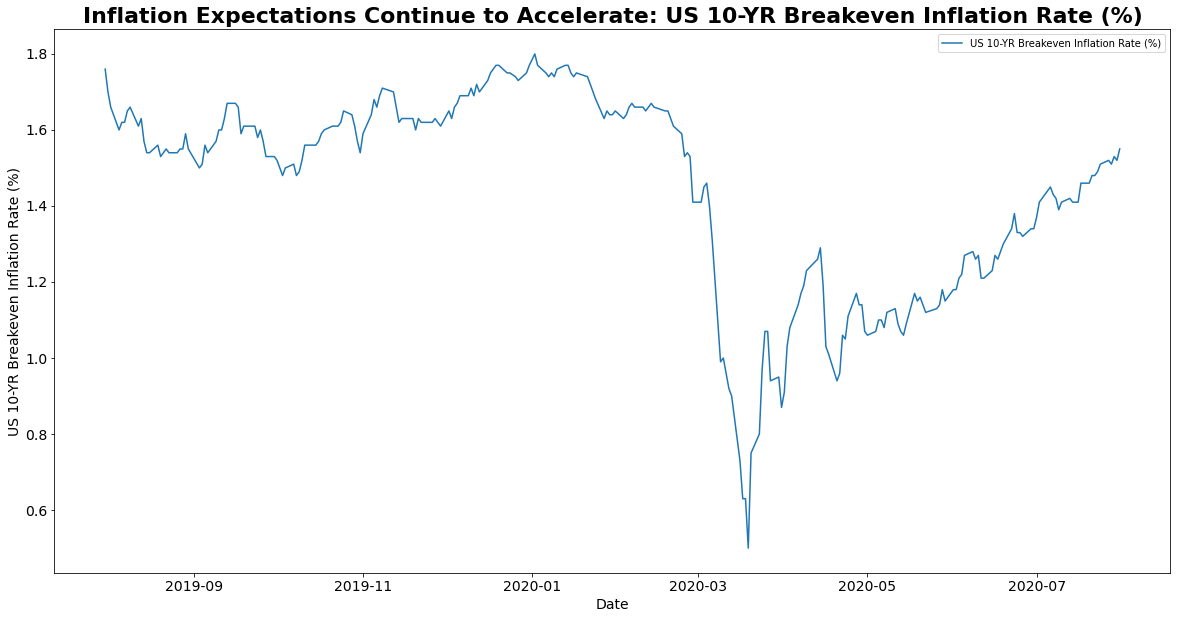

In [26]:
# Create plot function
def create_plot(x_axis_data, y_axis_data, y_axis_label, title):
    plt.subplots(figsize=(20,10))
    plt.plot(x_axis_data, y_axis_data, label=y_axis_label)
    plt.legend()
    plt.xlabel("Date",  fontdict={'fontsize':'14'})
    plt.ylabel(y_axis_label,  fontdict={'fontsize':'14'})
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.title(title, fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.savefig(f'Images/FRED/{title}.png', bbox_inches="tight")

create_plot(T10YIE_df.index[-252:], 
            T10YIE_df["value"][-252:], 
            "US 10-YR Breakeven Inflation Rate (%)",
           "Inflation Expectations Continue to Accelerate: US 10-YR Breakeven Inflation Rate (%)")
#create_plot(US_30_Mortgage_df.index, 
 #           US_30_Mortgage_df["value"], 
  #          "30-YR Fixed Rate Mortgage Average in the US", 
   #         "Mortgage Rates Pushing New Lows")